In [1]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('boosting.csv')

In [3]:
data.head()

,Attention,BERT,Siamese,Original
0,0.564796,0.000561,0.605149,0
1,0.416735,0.000112,0.289812,0
2,0.309445,0.000374,0.112079,0
3,0.007259,0.000008,0.057813,0
4,0.038641,0.000007,0.137986,0


In [35]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [36]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.35, learning_rate = 0.3, max_depth = 5, alpha = 10, n_estimators = 20)

In [39]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.35, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.3, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=20, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=10,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [40]:
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.187089


In [41]:
xg_reg.fit(X,y)

XGBRegressor(alpha=10, base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.35, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.3, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=20, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=10,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [42]:
preds = xg_reg.predict(X)
rmse = np.sqrt(mean_squared_error(y, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.186977


In [43]:
preds_df = pd.DataFrame(preds)

In [44]:
preds_df.to_csv('XG_Boost_predictions.csv')

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [46]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)

In [47]:
model = abc.fit(X_train, y_train)

In [48]:
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.165136


In [49]:
model = abc.fit(X, y)

In [50]:
preds = model.predict(X)

In [51]:
preds_df = pd.DataFrame(preds)
preds_df.to_csv('AdaBoost_predictions.csv')

In [52]:
#Training is over for Both boosting models
#Below is final testing outputs

In [64]:
data = pd.read_csv('dev_data.csv')

In [65]:
data.head()

,Attention,BERT,Siamese,Original
0,0.730456,0.000534,0.916136,0
1,0.018418,0.000008,0.157295,0
2,0.458345,0.998228,0.753561,1
3,0.004169,0.000009,0.069967,0
4,0.309448,0.004989,0.160937,0


In [66]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [67]:
xg_preds = xg_reg.predict(X)
ada_preds = model.predict(X)

In [68]:
rmse = np.sqrt(mean_squared_error(y, xg_preds))
print("XGB RMSE: %f" % (rmse))

rmse = np.sqrt(mean_squared_error(y, ada_preds))
print("ADB RMSE: %f" % (rmse))

XGB RMSE: 0.273707
ADB RMSE: 0.302025


In [69]:
predictions_df = df = pd.DataFrame({'XGB':xg_preds, 'ADB':ada_preds})

In [70]:
predictions_df.head()

,XGB,ADB
0,0.296508,0
1,0.026421,0
2,0.893018,1
3,-0.009562,0
4,0.082637,0


In [71]:
predictions_df.to_csv('final_test_predictions.csv')

In [5]:
train = pd.read_csv('boosting.csv')
test = pd.read_csv('dev_data.csv')

In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [8]:
scores = np.array(train['Attention'])
y = np.array(train['Original'])

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
auc = metrics.roc_auc_score(y, scores)

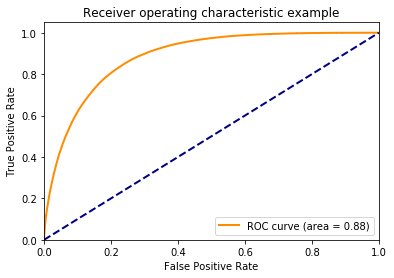

In [28]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()